# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [1]:
import os
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
qb_df_orig = pd.read_csv("./nfl/Game_Logs_Quarterback.csv")

In [3]:
qb_df_orig.columns

Index(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started', 'Passes Completed', 'Passes Attempted',
       'Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt',
       'TD Passes', 'Ints', 'Sacks', 'Sacked Yards Lost', 'Passer Rating',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost'],
      dtype='object')

In [4]:
qb_df = qb_df_orig[["Week","Year", "Outcome", "Passing Yards Per Attempt", "TD Passes"]].copy()
qb_df[["Passing Yards Per Attempt", "TD Passes"]] = qb_df[["Passing Yards Per Attempt","TD Passes"]].apply(pd.to_numeric, errors = "coerce")

In [5]:
qb_df[["Passing Yards Per Attempt", "TD Passes"]] = qb_df[["Passing Yards Per Attempt", "TD Passes"]].fillna(0)

In [6]:
qb_df = qb_df.groupby(["Week", "Year", "Outcome"]).sum().reset_index()

In [7]:
qb_df = qb_df.rename(columns = {"Passing Yards Per Attempt": "PYPA", "TD Passes": "TDP"})

In [8]:
qb_df = qb_df[(qb_df.Year >= 2000) & (qb_df.TDP >= 2)]

In [9]:
qb_df.describe()

,Week,Year,PYPA,TDP
count,699.000000,699.000000,699.000000,699.000000
mean,10.726753,2008.128755,106.322890,15.851216
std,6.014406,4.893187,90.893926,10.494133
min,0.000000,2000.000000,6.200000,2.000000
25%,6.000000,2004.000000,57.800000,8.000000
50%,11.000000,2008.000000,83.100000,14.000000
75%,16.000000,2012.000000,111.150000,22.000000
max,22.000000,2016.000000,455.200000,54.000000


In [10]:
X = qb_df.PYPA.values.reshape(-1,1)
Y = qb_df.TDP.values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

# Regression Model (Ridge)

In [12]:
model = linear_model.Ridge()
model.fit(X_train, y_train)

Ridge()

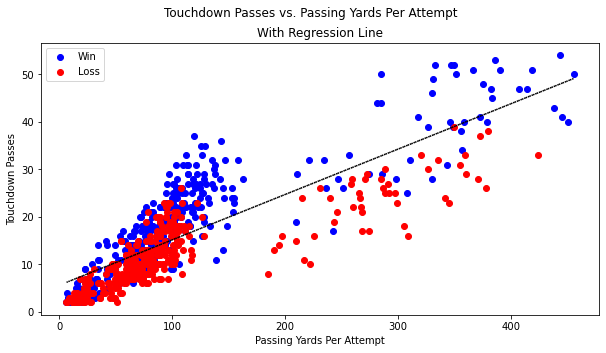

In [13]:
plt.scatter(qb_df.PYPA[qb_df.Outcome == "W"], qb_df.TDP[qb_df.Outcome == "W"], c = "blue", label = "W")
plt.scatter(qb_df.PYPA[qb_df.Outcome == "L"], qb_df.TDP[qb_df.Outcome == "L"], c = "red", label = "L")
plt.plot(X, np.dot(X, model.coef_) + model.intercept_, c = "black", linestyle = "dotted")
plt.xlabel("Passing Yards Per Attempt")
plt.ylabel("Touchdown Passes")
plt.suptitle("Touchdown Passes vs. Passing Yards Per Attempt")
plt.title("With Regression Line")
plt.legend(["Win", "Loss"])

In [14]:
error_dict = {
    "MSE_Train": [X_train, y_train],
    "MAE_Train": [X_train, y_train],
    "MSE_Test": [X_test, y_test],
    "MAE_Test": [X_test, y_test]    
}

In [15]:
for name, data in error_dict.items():
    if "MSE" in name:
        err = metrics.mean_squared_error(data[1], np.dot(data[0], model.coef_) + model.intercept_)
    else:
        err = metrics.mean_absolute_error(data[1], np.dot(data[0], model.coef_) + model.intercept_)
    print(f"{name}: {err:.4f} \n")

MSE_Train: 34.8994 

MAE_Train: 4.6812 

MSE_Test: 33.0950 

MAE_Test: 4.5392 



# Classification Model (Decision Tree)

In [16]:
qb_df = qb_df_orig[["Player Id","Outcome","Year","Week", "Passes Completed", "Passes Attempted", "Passing Yards", "Passing Yards Per Attempt", "TD Passes", "Ints", "Sacks", "Sacked Yards Lost","Rushing Attempts", "Rushing Yards", "Yards Per Carry", "Rushing TDs", "Fumbles"]].copy()

In [17]:
qb_df[["Passes Completed",
       "Passes Attempted",
       "Passing Yards",
       "Passing Yards Per Attempt",
       "TD Passes",
       "Ints",
       "Sacks",
       "Sacked Yards Lost",
       "Rushing Attempts",
       "Rushing Yards",
       "Yards Per Carry",
       "Rushing TDs",
       "Fumbles"]] = qb_df[["Passes Completed",
                            "Passes Attempted",
                            "Passing Yards",
                            "Passing Yards Per Attempt",
                            "TD Passes",
                            "Ints",
                            "Sacks",
                            "Sacked Yards Lost",
                            "Rushing Attempts",
                            "Rushing Yards",
                            "Yards Per Carry",
                            "Rushing TDs",
                            "Fumbles"]].apply(pd.to_numeric, errors = "coerce")

In [18]:
qb_df = qb_df.fillna(0)
qb_df = qb_df[(qb_df.Year >= 2000) & (qb_df.Outcome != "T")]

In [19]:
df = qb_df.groupby(["Year","Player Id", "Week", "Outcome"]).sum().reset_index()

In [20]:
X = qb_df.drop(["Year","Player Id", "Week", "Outcome"], axis = 1)
y = qb_df["Outcome"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [22]:
orig_model = DecisionTreeClassifier(criterion = "entropy")

In [23]:
orig_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
predictions = orig_model.predict(X_test)

In [25]:
print(f"Accuracy Score: {metrics.accuracy_score(y_test, predictions) * 100:.4f}%")
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

Accuracy Score: 55.4407%
[[1635  429]
 [1467  724]]
              precision    recall  f1-score   support

           L       0.53      0.79      0.63      2064
           W       0.63      0.33      0.43      2191

    accuracy                           0.55      4255
   macro avg       0.58      0.56      0.53      4255
weighted avg       0.58      0.55      0.53      4255



### Improve Model By Removing Outliers

In [26]:
index_feats = ["Outcome", "Player Id","Year","Week"]
included_feats = list(X_train.columns)

In [27]:
included_feats

['Passes Completed',
 'Passes Attempted',
 'Passing Yards',
 'Passing Yards Per Attempt',
 'TD Passes',
 'Ints',
 'Sacks',
 'Sacked Yards Lost',
 'Rushing Attempts',
 'Rushing Yards',
 'Yards Per Carry',
 'Rushing TDs',
 'Fumbles']

In [28]:
qb_df = qb_df_orig[index_feats + included_feats].copy()

In [29]:
qb_df[included_feats] = qb_df[included_feats].apply(pd.to_numeric, errors = "coerce")
qb_df = qb_df.dropna()
qb_df = qb_df[(qb_df.Year >= 2000) & (qb_df.Outcome != "T")]
qb_df = qb_df[(qb_df["Passing Yards"].between(50,300))]

In [30]:
scaler = preprocessing.StandardScaler()

qb_df[included_feats] = scaler.fit_transform(qb_df[included_feats])

In [31]:
df = qb_df
X = df.drop(index_feats, axis = 1)
y = df["Outcome"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [33]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 9, min_samples_leaf = 42)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=42)

In [35]:
predictions = model.predict(X_test)

In [36]:
print(f"Accuracy Score: {metrics.accuracy_score(y_test, predictions) * 100:.4f}%")
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

Accuracy Score: 70.1944%
[[209  53]
 [ 85 116]]
              precision    recall  f1-score   support

           L       0.71      0.80      0.75       262
           W       0.69      0.58      0.63       201

    accuracy                           0.70       463
   macro avg       0.70      0.69      0.69       463
weighted avg       0.70      0.70      0.70       463

